# <center>Perturbation</center>

Now we try to get similar results as in <i>Linear Response</i> part of the project, but now we are not going to use Linear Response Theory. Instead we'll modify Heisenberg model hamiltonian by adding a small perturbation to it. Perturbation Theory is a powerful approximation used to get insights into slightly disrupted quantum system. In our case perturbation is going to be:

### <center>$\delta\hat{H}(t < 0) = h\sum_icos(qi)\hat{S}_i^z$</center>

Where $\delta\hat{H}(t < 0)$ is a perturbation calculated for negative time before we start calculating operator's $\hat{S}_i^z$ time evolution, $cos(qi)$ will create wave modulations and $h$ is a factor we're going to optimize to get satisfying results. Added to our unperturbed hamiltonian we get:

### <center>$\hat{H}_P = \frac{J}{2}\sum_{i=1}^{L-1}\left(\hat{S}_i^+\hat{S}_{i+1}^- + \hat{S}_i^-\hat{S}_{i+1}^+ \right) + J\Delta\sum_{i=1}^{L-1}\hat{S}_i^z\hat{S}_{i+1}^z + \delta\hat{H}(t < 0)$</center>

After creating the hamiltonian we evolve in time the ground state $|\psi_0\rangle$:

### <center>$\langle \hat{S}_i^z\rangle(t) = \langle \psi_0(t)|\hat{S}_i^z|\psi_0(t)\rangle$</center>

Then we store the dynamic behavior of considered system and apply a <i>Fourier Transform</i> to it:

## <center>$\tilde{S}(q, \omega) = \left| \sum_ie^{lqi}\sum_te^{i\omega t}\langle \hat{S}_i^z(t)\rangle\right|^2$</center>

Which should get us the same <i>Linear Response</i>. $l$ is an imaginary unit. Let's implement it in a code.

In [1]:
import sys
sys.path.append('..')

In [2]:
from OperatorFunctions import wave_vector
from HamiltonianClass import QuantumState
from IPython.display import display, Latex
import numpy as np
import ipywidgets
from matplotlib import pyplot as plt

# variable used to improve notation
rangle = r'\rangle'
hat_H = r'\hat{H}'
til_S = r'\tilde{S}'

In [3]:
L = 4
J = 1
delta = 1
h = 1
quantum_state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)

k_list = [k for k in range(L + 1)]
wave_vectors = [wave_vector(L, k) for k in k_list]

We begin by creating a perturbation hamiltonian $\delta\hat{H}(t < 0) = h\sum_icos(qi)\hat{S}_i^z$:

In [4]:
q = wave_vector(L, 3)
perturbation = quantum_state.get_wave_vector_perturbation(h, q)
perturbation.print()

  -1.0000e+00            0            0            0            0            0
            0   1.6452e-16            0            0            0            0
            0            0  -1.0000e+00            0            0            0
            0            0            0   1.0000e+00            0            0
            0            0            0            0  -1.6452e-16            0
            0            0            0            0            0   1.0000e+00


Whole hamiltonian with perturbation added to it:

Text(0.5, 1.0, '$\\hat{H}_P$ operator:')

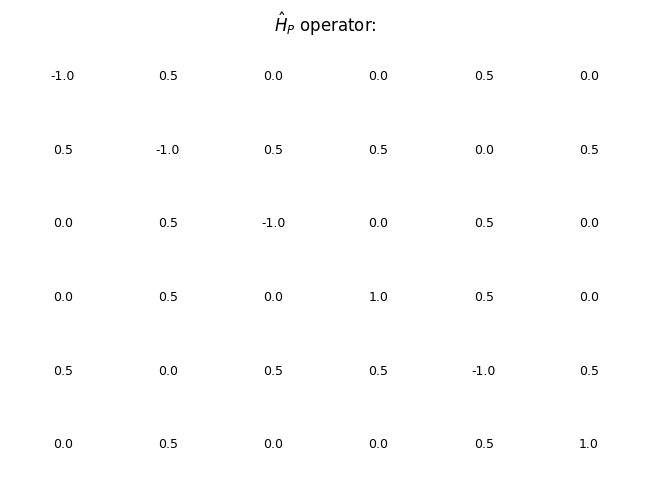

In [5]:
H_P = perturbation + quantum_state.get_hamiltonian()

figure1, axes1 = plt.subplots(1, 1, layout='constrained')
quantum_state.plot_data(matrix=H_P, axes=axes1)
axes1.set_title(r'$\hat{H}_P$ operator:')

Parameters can be tweaked below:

In [6]:
def plot_perturbation_hamiltonian(wave_vector_number=0, h=1):
    L=4
    state = QuantumState(L, 1, 1, is_pbc=True, is_reduced=True)
    perturbation = quantum_state.get_wave_vector_perturbation(h, wave_vector(L, wave_vector_number))
    H_P = perturbation + quantum_state.get_hamiltonian()
    
    figure, axes = plt.subplots(1, 1, layout='constrained')
    axes.set_title('$\hat{H}_P$ operator:')
    state.plot_data(matrix=H_P, axes=axes)
    plt.show()

In [7]:
ipywidgets.interact(plot_perturbation_hamiltonian, 
                    wave_vector_number=(0, 4, 1),
                    h=(0.01, 10, 0.1))

interactive(children=(IntSlider(value=0, description='wave_vector_number', max=4), FloatSlider(value=1.0, desc…

<function __main__.plot_perturbation_hamiltonian(wave_vector_number=0, h=1)>

Now we need to get a ground state $|\psi_{H_P}^0\rangle$ from perturbed hamiltonian.

In [8]:
ground_state = quantum_state.get_state_vector()
quantum_state.eigenstates(add_perturbation=perturbation)
quantum_state.set_vector_from_eigenstate(0)
ground_state_perturbed = quantum_state.get_state_vector()
quantum_state.print_state_vector()

0.4467|0011> - 0.5227|0101> + 0.4467|0110> + 0.1649|1001> - 0.5227|1010> + 0.1649|1100>


Let's compare two state vectors:

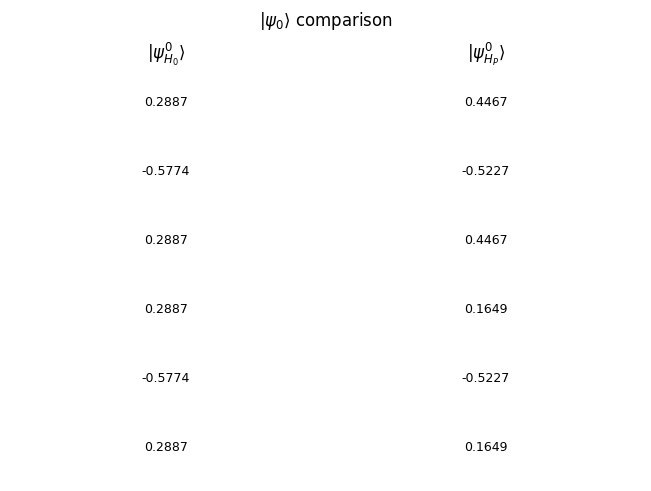

In [9]:
fig2, ax2 = plt.subplots(1, 2, layout='constrained')
fig2.suptitle(f'$|\psi_0{rangle}$ comparison')
ax2[0].set_title(r'$|\psi_{H_0}^0' + f'{rangle}$')
ax2[1].set_title(r'$|\psi_{H_P}^0' + f'{rangle}$')
quantum_state.plot_data(matrix=ground_state, axes=ax2[0])
quantum_state.plot_data(matrix=ground_state_perturbed, axes=ax2[1])
plt.show()

In [10]:
def plot_state_vectors(wave_vector_number=2, h=1):
    L=6
    state = QuantumState(L, 1, 1, is_pbc=True, is_reduced=True)
    vector1 = state.get_state_vector()
    perturbation = state.get_wave_vector_perturbation(h, wave_vector(L, wave_vector_number))
    state.eigenstates(add_perturbation=perturbation)
    state.set_vector_from_eigenstate(0)
    vector2 = state.get_state_vector()

    figure, axes = plt.subplots(1, 2, layout='constrained')
    figure.suptitle(f'$|\psi_0{rangle}$ comparison')
    axes[0].set_title(r'$|\psi_{H_0}^0' + f'{rangle}$')
    axes[1].set_title(r'$|\psi_{H_P}^0' + f'{rangle}$')
    state.plot_data(matrix=vector1, axes=axes[0])
    state.plot_data(matrix=vector2, axes=axes[1])

    plt.show()

In [11]:
ipywidgets.interact(plot_state_vectors,
                    wave_vector_number=(0, 6, 1),
                    h=(0.01, 10, 0.1))

interactive(children=(IntSlider(value=2, description='wave_vector_number', max=6), FloatSlider(value=1.0, desc…

<function __main__.plot_state_vectors(wave_vector_number=2, h=1)>

Now, to compute a linear response of specific wave vector $q$ we have to generate time domain, compute time evolution for each spin operator $\hat{S}_i^z$ and sum it up multiplying by $q$ in exponential function.

In [12]:
time_range = np.linspace(0, 100, 50)
time_evolution_grid = quantum_state.spin_evolution_range(time_range)
omega_range = quantum_state.generate_linspace_of_omega(0.1, boundary=(0, 3))
q = wave_vector(L, 1)

In [13]:
linear_response = quantum_state.calculate_linear_response_fft(omega_range, time_range, time_evolution_grid, q)
print(linear_response)

[2.97164311e+02 9.80254779e+00 1.42932356e+00 2.00207289e-01
 7.54357255e-01 6.77030907e-02 1.86521571e-01 2.32163610e-01
 1.33028822e-04 1.64234687e-01 7.68295342e-02 2.50180819e-02
 1.34163869e-01 1.50961423e-02 6.58201464e-02 9.76037794e-02
 2.83419806e-04 1.08466884e-01 5.68530253e-02 2.58954187e-02
 1.48984864e-01 1.75228177e-02 1.10386523e-01 1.86889573e-01
 1.55642934e-03 3.46214828e-01 2.27242103e-01 1.74962273e-01
 1.49838978e+00 3.24357307e-01]


Now let's plot it on a graph $\tilde{S}(q, \omega)$:

In [14]:
def plot_linear_response(J=1, delta=1, h=1, spin_number=3):
    if J != 0:
        L = 8
        bin_ = 0.001
        state = QuantumState(L, J, delta, is_reduced=True, is_pbc=True)
        wave_vector_ = wave_vector(L, spin_number)
        omega_range = state.generate_linspace_of_omega(bin_, boundary=(0, 3))
        time_range = np.linspace(0, 100, 50)
        
        perturbation = state.get_wave_vector_perturbation(h, wave_vector_)
        state.eigenstates(add_perturbation=perturbation)
        state.set_vector_from_eigenstate(0)
        state.eigenstates()
        time_grid = state.spin_evolution_range(time_range)
        linear_response = state.calculate_linear_response_fft(omega_range,
                                                              time_range,
                                                              time_grid,
                                                              wave_vector_)
        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.set_title(r'$\tilde{S}(q, \omega)$')
        axes.plot(omega_range, linear_response, color='black')
        axes.set(ylabel=r'$\tilde{S}(q, \omega)$', xlabel=r'$\omega$')
        axes.grid()
        plt.show() 

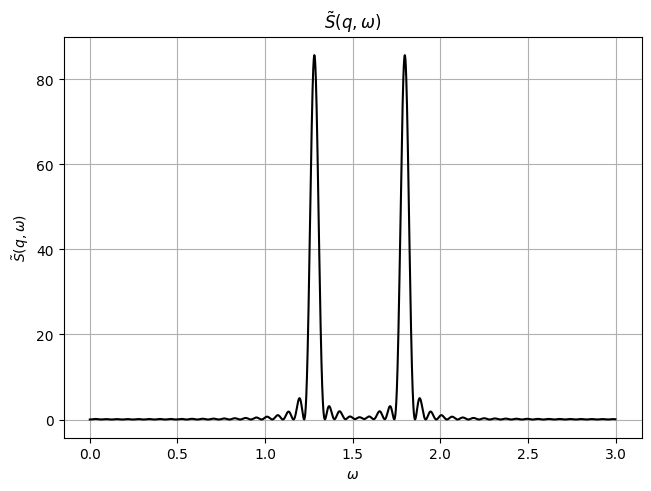

In [15]:
plot_linear_response(h=0.5, spin_number=6)

In [16]:
ipywidgets.interact(plot_linear_response,
                   J=(-3, 3, 0.2),
                   delta=(0, 2, 0.1),
                   h=(0.01, 10, 0.1),
                   spin_number=(0, 8, 1))

interactive(children=(FloatSlider(value=1.0, description='J', max=3.0, min=-3.0, step=0.2), FloatSlider(value=…

<function __main__.plot_linear_response(J=1, delta=1, h=1, spin_number=3)>

Now let's plot it in 2D:

In [17]:
def plot_linear_response_grid(J=1, delta=0, h=1):
    if J != 0:
        L = 8
        k_list = [k for k in range(L + 1)]
        wave_vector_list = np.array([wave_vector(L, k) for k in k_list])
        bin_ = 0.005
        time_range = np.linspace(0, 100, 50)
        state = QuantumState(L, J, delta, is_pbc=True, is_reduced=True)
        omega_range = state.generate_linspace_of_omega(bin_, boundary=(0, 3))

        linear_response_grid = None
        for wave_vector_, k in zip(wave_vector_list, k_list):
            perturbation = state.get_wave_vector_perturbation(h, wave_vector_)
            state.eigenstates(add_perturbation=perturbation)
            state.set_vector_from_eigenstate(0)
            state.eigenstates()
            time_evolution_grid = state.spin_evolution_range(time_range)
            linear_response = state.calculate_linear_response_fft(omega_range, time_range,
                                                                  time_evolution_grid, wave_vector_)[:, None]
            if k == 0:
                linear_response_grid = linear_response
            else:
                linear_response_grid = np.concatenate((linear_response_grid, linear_response), axis=1)
        linear_response_grid = np.sqrt(linear_response_grid)
        figure, axes = plt.subplots(1, 1, layout='constrained')
        sq_min, sq_max = 0, int(linear_response_grid.max())
        sq_max = 1 if sq_max == 0 else sq_max
        grid = axes.pcolormesh(wave_vector_list, omega_range, linear_response_grid, 
                               cmap='hot', vmin=sq_min, vmax=sq_max, shading='gouraud')
        figure.colorbar(grid, ax=axes)
        axes.set_title(r'$\tilde{S}(q, \omega)$')
        axes.set(xlabel='wave vector $q$', ylabel='$\omega$')
        plt.show()    

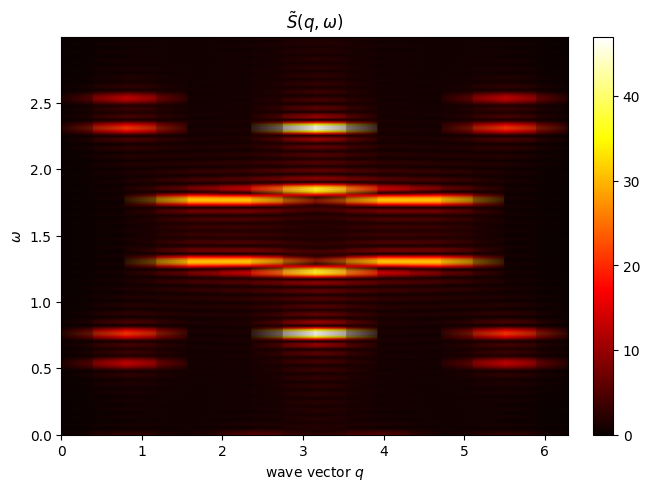

In [18]:
plot_linear_response_grid()

In [19]:
ipywidgets.interact(plot_linear_response_grid,
                    J=(-3, 3, 0.2),
                    delta=(0, 2, 0.1),
                    h=(0.01, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='J', max=3.0, min=-3.0, step=0.2), FloatSlider(value=…

<function __main__.plot_linear_response_grid(J=1, delta=0, h=1)>